<a href="https://colab.research.google.com/github/changsin/MIU_ML/blob/main/notebooks/06.PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear regression
Linear regression is a parametric method that follows a linear model: i.e., there is a linear relationship between variables.


## Model
The equation of the linear model is:

$$ h_\theta(x) = \theta_0 + \theta_1x $$

- h: hypothesis
- $\theta_0, \theta_1 $: parameters
- x: input


## Cost function
Following Andrew Ng's [Coursera Machine Learning](https://www.coursera.org/learn/machine-learning), here is the cost function we use a slightly modified MSE (Mean Squared Error) to compute the error:

*(To display math expressions correctly, open the notebook in colab)

$$ J(\theta) = \frac{1}{2m}\sum\limits_{t=1}^{m}(h_\theta(x^{(i)}) - y^{(i)})^2 $$

- $J(\theta)$: Cost function
- m: number  of samples
- h: hypothesis
- y: ground truth

### Two things to note are:
1. Note that the superscript i in ($x^{(i)}, y^{(i)}$) does not mean an exponential term , but an index.
2. The denominator m is multiplied by 2 to make further calculations (i.e., taking derivatives) easy. It does not affect the result in computing the errors.



## Gradient Descent
The goal of linear regression is to find the parameters $\theta_0$ and $ \theta_1$ that minimize the error.
That amounts to taking partial derivatives of the quadratic error function in terms of the two parameter terms $\theta_0$ and $ \theta_1$. You can see why by plotting the error function. The convex shape tells us that there is a global minimum at the lowest point and partial derivatives would help us calculate how much we need to adjust the parameters on each iteration. 


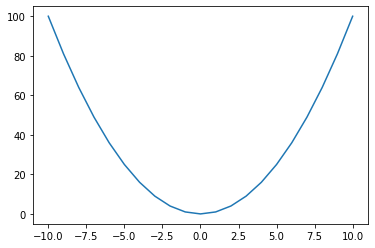

In [118]:
import numpy as np
import matplotlib.pyplot as plt

X = np.arange(-10, 11, 1)
Y = X**2
Y
plt.plot(X, Y)

### Derivation of partial derivatives
Taking partial derivatives on the cost function J:
$$
J(\theta) = \frac{1}{2m}\sum\limits_{t=1}^{m}(h_\theta(x^{(i)}) - y^{(i)})^2 
$$

means:

$$
\frac{\delta}{\delta\theta_j} J(\theta_0, \theta_1) = \frac{\delta}{\delta\theta_j}[ \frac{1}{2m}\sum\limits_{t=1}^{m}(h_\theta(x^{(i)}) - y^{(i)})^2 ]
$$

Since $h_\theta = \theta_0 + \theta_1x $, we can substitute h:

$$
 = \frac{\delta}{\delta\theta_j}[ \frac{1}{2m}\sum\limits_{t=1}^{m}(\theta_0 + \theta_1x^{(i)} - y^{(i)})^2 ]
$$

To take a partial derivative, you need to expand the term.

$$
 (\theta_0 + \theta_1x^{(i)} - y^{(i)})^2 = \theta_0^2 + (\theta_1x^{(i)})^2 + (y^{(i)})^2 + 2\theta_0 \theta_1x^{(i)} - 2\theta_0 y^{(i)} - 2\theta_1x^{(i)} y^{(i)}
$$

Taking partial derivatives for $ \theta_0 $ and $\theta_1$, gives us:


$$
\frac{\delta}{\delta\theta_0}[ 
\theta_0^2 + (\theta_1x^{(i)})^2 + (y^{(i)})^2 + 2\theta_0 \theta_1x^{(i)} - 2\theta_0 y^{(i)} - 2\theta_1x^{(i)} y^{(i)}]
$$

$$
= 2\theta_0 + 2\theta_1x^{(i)} - 2y^{(i)}
$$
$$
= 2(\theta_0 + \theta_1x^{(i)} - y^{(i)}) = 2(h_\theta x^{(i)} - y^{(i)})
$$
In other words,
$$ \frac{\delta}{\delta\theta_0} J(\theta) = \frac{1}{m}\sum\limits_{i=1}^{m}(h_\theta x^{(i)} - y^{(i)})
$$


Similarly, for $ \theta_1$:
$$
\frac{\delta}{\delta\theta_1}[ 
\theta_0^2 + (\theta_1x^{(i)})^2 + (y^{(i)})^2 + 2\theta_0 \theta_1x^{(i)} - 2\theta_0 y^{(i)} - 2\theta_1x^{(i)} y^{(i)}]
$$

$$
= 2\theta_1x^{(i)} + 2\theta_0x^{(i)} - 2x^{(i)}y^{(i)}
$$

$$
= 2(\theta_0 + \theta_1x^{(i)} - y^{(i)})x^{(i)} = 2(h_\theta(x^{(i)}) - y^{(i)})x^{(i)}
$$

In other words,

$$ \frac{\delta}{\delta\theta_1} J(\theta) = \frac{1}{m}\sum\limits_{i=1}^{m}(h_\theta(x^{(i)}) - y^{(i)})x^{(i)} $$


In summary,

$$ \frac{\delta}{\delta\theta_0} J(\theta_0, \theta_1) = \frac{1}{m}\sum\limits_{i=1}^{m}(h_\theta(x^{(i)}) - y^{(i)}) $$

and

$$ \frac{\delta}{\delta\theta_1} J(\theta_0, \theta_1) = \frac{1}{m}\sum\limits_{i=1}^{m}(h_\theta(x^{(i)}) - y^{(i)})x^{(i)} $$

In practice, we add a learning rate $\alpha$ and update all $\theta s$ simultaneously. 

$$ \theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_j^{(i)} \qquad \text{simultaneously update } \theta_j \text{ for all } j$$

So this is the formula we will use to update the parameters.

In [119]:
!git clone https://github.com/changsin/MIU_ML

fatal: destination path 'MIU_ML' already exists and is not an empty directory.


# Sample dataset:
 [sklearn diabetes](https://scikit-learn.org/stable/datasets/toy_dataset.html)

## X column attributes:
1. age age in years
2. sex
3. bmi body mass index
4. bp average blood pressure
5. s1 tc, total serum cholesterol
6. s2 ldl, low-density lipoproteins
7. s3 hdl, high-density lipoproteins
8. s4 tch, total cholesterol / HDL
9. s5 ltg, possibly log of serum triglycerides level
10. s6 glu, blood sugar level

(mean centered and scaled by the standard deviation times n_samples (i.e. the sum of squares of each column totals 1).

## y target value:
 quantitative measure of disease progression one year after baseline


In [8]:
from sklearn import datasets

X, y = datasets.load_diabetes(return_X_y=True)
X.shape

(442, 10)

In [9]:
# just use the first 20 items in the dataset
PART_SIZE = 20

# m = y.size
m = PART_SIZE

# Add a column of ones to X. The numpy function stack joins arrays along a given axis. 
# The first axis (axis=0) refers to rows (training examples) 
# and second axis (axis=1) refers to columns (features).
X_part = np.stack([np.ones(m), X[:PART_SIZE, 8]*100], axis=1)
y_part = y[:PART_SIZE]

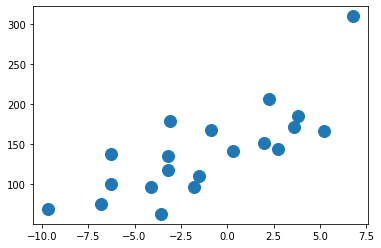

In [10]:
import matplotlib.pyplot as plt

def plot_data(X, y, limit=20):
  fig, ax = plt.subplots()
  ax.plot(X, y, marker='o', linestyle='', ms=12, label='+')

  return ax

ax = plot_data(X_part[:, 1], y_part)

x_line = np.linspace(-10, 10, 100)
y_line = 10*x_line + 150

# ax.plot(x_line, y_line, 'g', label='y=wx+b')

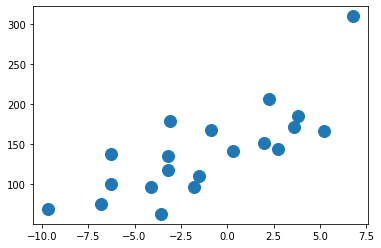

In [11]:
sample_data = np.stack((X_part[:, 1], y_part), axis=1)

plot_data(sample_data[:, 0], sample_data[:, 1])

variance ratio [0.99753664]
[3230.63375048]


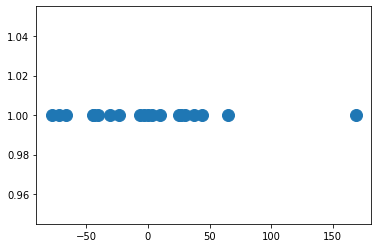

In [12]:
from sklearn.decomposition import PCA

K = 1
pca = PCA(n_components=K)

sample_data_reduced = pca.fit_transform(sample_data)
sample_data_reduced

y_constant = np.ones(len(sample_data_reduced))

plot_data(sample_data_reduced, y_constant)


print("variance ratio", pca.explained_variance_ratio_)
print(pca.explained_variance_)

[0.9919371] [22.18332071]


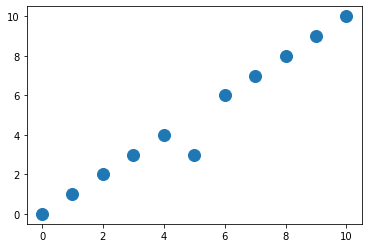

In [47]:
import numpy as np

X_lin = np.linspace(0, 10, 11)
X_lin

Y_lin = np.linspace(0, 10, 11)
Y_lin
Y_lin[5] = 3

lin_data = np.stack((X_lin, Y_lin), axis=1)


plot_data(X_lin, Y_lin)
pca_lin = PCA(n_components=K)

lin_reduced = pca_lin.fit_transform(lin_data)
lin_reduced

print(pca_lin.explained_variance_ratio_, pca_lin.explained_variance_)

In [38]:
from sklearn import preprocessing

def cal_variance_ratio(data, projection):
  m = data.shape[0]

  # total_variation = (sum([x*x for x, x in zip(data, data)])).sum()
  total_variation = sum(np.dot(X.T, X)) 
  total_variation = total_variation/m

  delta_sum = (sum([(d - p)*(d - p) for d, p in zip(data, projection)])).sum()
  avg_square_proj_error = delta_sum/m

  return avg_square_proj_error/total_variation

cal_variance_ratio(lin_data, lin_reduced)

array([  637.36776769,   919.85147076,   598.49357853,   561.5790122 ,
         444.80908329,   485.03294465, -1177.88510084,   494.39978656,
         484.9624002 ,   521.49323633])

In [37]:
mu = np.mean(lin_data[:, 0]), np.mean(lin_data[:, 1])
# 
mu
lin_data_norm = np.array([[x - mu[0], y - mu[1]] for x, y in zip(lin_data[:, 0], lin_data[:, 1])])

cal_variance_ratio(lin_data_norm, lin_reduced)

5.828427124746191

In [44]:
np.matmul(lin_data.T, lin_data)/len(lin_data)

array([[35., 35.],
       [35., 35.]])

In [33]:
lin_data

array([[ 0.,  0.],
       [ 1.,  1.],
       [ 2.,  2.],
       [ 3.,  3.],
       [ 4.,  4.],
       [ 5.,  5.],
       [ 6.,  6.],
       [ 7.,  7.],
       [ 8.,  8.],
       [ 9.,  9.],
       [10., 10.]])

In [137]:
sum([(d - p)*(d - p) for d, p in zip(lin_data, lin_reduced)]).sum()

1832.253967444162

In [ ]:
sum([d*d for d, p in zip(lin_data, lin_reduced)]).sum()

In [139]:
from sklearn.preprocessing import normalize
normalize(lin_data)

array([[0.        , 0.        ],
       [0.70710678, 0.70710678],
       [0.70710678, 0.70710678],
       [0.70710678, 0.70710678],
       [0.70710678, 0.70710678],
       [0.70710678, 0.70710678],
       [0.70710678, 0.70710678],
       [0.70710678, 0.70710678],
       [0.70710678, 0.70710678],
       [0.70710678, 0.70710678],
       [0.70710678, 0.70710678]])

In [140]:
lin_data

array([[ 0.,  0.],
       [ 1.,  1.],
       [ 2.,  2.],
       [ 3.,  3.],
       [ 4.,  4.],
       [ 5.,  5.],
       [ 6.,  6.],
       [ 7.,  7.],
       [ 8.,  8.],
       [ 9.,  9.],
       [10., 10.]])

In [130]:
lin_reduced

array([[ 7.07106781],
       [ 5.65685425],
       [ 4.24264069],
       [ 2.82842712],
       [ 1.41421356],
       [-0.        ],
       [-1.41421356],
       [-2.82842712],
       [-4.24264069],
       [-5.65685425],
       [-7.07106781]])

In [113]:
def dot_product(a_vector,b_vector):
    #a1 x b1 + a2 * b2..an*bn return scalar
    return sum([an*bn for an,bn in zip(a_vector,b_vector)])

In [112]:
np.dot(lin_data.T, lin_data)

t1 = np.array([[1, 1], [2, 2]])
t2 = np.array([[1, 1, 1], [2, 2, 2], [3, 3, 3]])

print(np.dot(t1, t1))
print(t1 @ t1)

t1 * t1.T

[[3 3]
 [6 6]]
[[3 3]
 [6 6]]


array([[1, 2],
       [2, 4]])

In [117]:
# print(dot_product(t2, t2))
# t2.shape

np.array([1, 1]).sum()

2

In [92]:
lin_data.shape

(11, 2)

In [64]:
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)



In [68]:
X_cen = X - X.mean(axis=0)  # 평균을 0으로
X_cov = np.dot(X_cen.T, X_cen) / 59
print(X_cov)

w, v = np.linalg.eig(X_cov)
print('eigenvalue :', w)
print('eigenvector :\n', v)

print('explained variance ratio :', w / w.sum())

[[0.69812855 0.17640539 0.12137931]
 [0.17640539 0.1801727  0.07253614]
 [0.12137931 0.07253614 0.04552382]]
eigenvalue : [0.77830975 0.1351726  0.01034272]
eigenvector :
 [[ 0.93636116  0.34027485 -0.08626012]
 [ 0.29854881 -0.90119108 -0.31420255]
 [ 0.18465208 -0.2684542   0.94542898]]
explained variance ratio : [0.84248607 0.14631839 0.01119554]


In [ ]:
sca

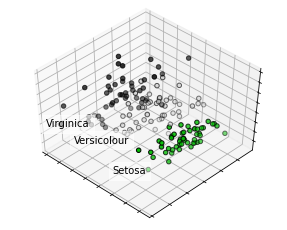

In [41]:

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition
from sklearn import datasets

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X_reduced = pca.transform(X)

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X_reduced[y == label, 0].mean(),
              X_reduced[y == label, 1].mean() + 1.5,
              X_reduced[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

In [46]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [43]:
X_reduced.shape

(150, 3)

In [39]:
def computeCost(X, y, theta):
    """
    Compute cost for linear regression. Computes the cost of using theta as the
    parameter for linear regression to fit the data points in X and y.
    
    Parameters
    ----------
    X : array_like
        The input dataset of shape (m x n+1), where m is the number of examples,
        and n is the number of features. We assume a vector of one's already 
        appended to the features so we have n+1 columns.
    
    y : array_like
        The values of the function at each data point. This is a vector of
        shape (m, ).
    
    theta : array_like
        The parameters for the regression function. This is a vector of 
        shape (n+1, ).
    
    Returns
    -------
    J : float
        The value of the regression cost function.
    
    Instructions
    ------------
    Compute the cost of a particular choice of theta. 
    You should set J to the cost.
    """
    
    # initialize some useful values
    m = y.size  # number of training examples
    
    # You need to return the following variables correctly
    J = 0
    
    # ====================== YOUR CODE HERE =====================

    # TODO:

    # ===========================================================
    return J

In [11]:
theta=np.array([0.0, 0.0])
J = computeCost(X_part, y_part, theta=theta)
print('With theta = [0, 0] \nCost computed = %.2f' % J)
print('Expected cost value (approximately) 11497.70\n')

With theta = [0, 0] 
Cost computed = 0.00
Expected cost value (approximately) 11497.70



In [12]:
def gradientDescent(X, y, theta, alpha, num_iters):
    """
    Performs gradient descent to learn `theta`. Updates theta by taking `num_iters`
    gradient steps with learning rate `alpha`.
    
    Parameters
    ----------
    X : array_like
        The input dataset of shape (m x n+1).
    
    y : array_like
        Value at given features. A vector of shape (m, ).
    
    theta : array_like
        Initial values for the linear regression parameters. 
        A vector of shape (n+1, ).
    
    alpha : float
        The learning rate.
    
    num_iters : int
        The number of iterations for gradient descent. 
    
    Returns
    -------
    theta : array_like
        The learned linear regression parameters. A vector of shape (n+1, ).
    
    J_history : list
        A python list for the values of the cost function after each iteration.
    
    Instructions
    ------------
    Peform a single gradient step on the parameter vector theta.

    While debugging, it can be useful to print out the values of 
    the cost function (computeCost) and gradient here.
    """
    # Initialize some useful values
    m = y.shape[0]  # number of training examples
    
    # make a copy of theta, to avoid changing the original array, since numpy arrays
    # are passed by reference to functions
    theta = theta.copy()
    
    J_history = [] # Use a python list to save cost in every iteration
    
    for i in range(num_iters):
        theta_zero, theta_one = theta
        # ==================== YOUR CODE HERE =================================
        
        # TODO

        # =====================================================================
        
        # save the cost J in every iteration
        J_history.append([J, theta_zero, theta_one])
    
    return theta, J_history

In [13]:
# initialize fitting parameters
theta = np.zeros(2)

# some gradient descent settings
iterations = 300
alpha = 0.01

theta, J_history = gradientDescent(X_part, y_part, theta, alpha, iterations)
print('Theta found by gradient descent: {:.4f}, {:.4f}'.format(*theta))

Theta found by gradient descent: 0.0000, 0.0000


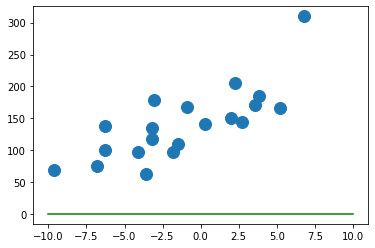

In [14]:
ax = plot_data(X_part[:, 1], y_part)

x_line = np.linspace(-10, 10, 100)
y_line = theta[1]*x_line + theta[0]

ax.plot(x_line, y_line, 'g', label='y=wx+b')

In [15]:
J_history = np.array(J_history)

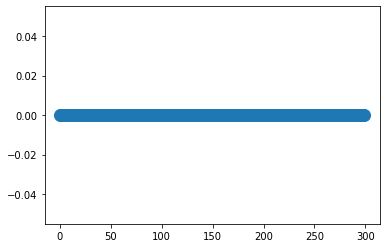

In [16]:
ax1 = plot_data(range(len(J_history)), J_history[:, 0])

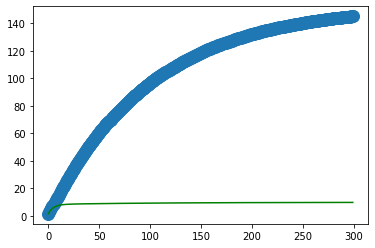

In [ ]:
ax1 = plot_data(range(len(J_history)), J_history[:, 1])

ax1.plot(range(len(J_history)), J_history[:, 2], 'g', label='y=wx+b')

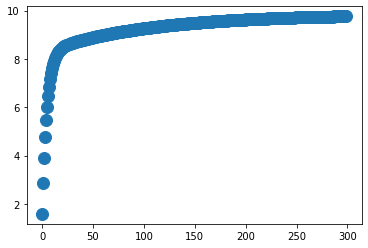

In [ ]:
ax1 = plot_data(range(len(J_history)), J_history[:, 2])